In [1]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
def negative(im, max_int):
    return (max_int - im).astype(np.uint8)

In [3]:
def pwr_law_t(im, gamma):
    return np.array(255*(im/255)**gamma,dtype='uint8')

In [4]:
def pc_lr_t(im, k, lt):
    im[np.where(np.logical_and(im>=lt[0]*255, im<=lt[1]*255))] = k[0]*im[np.where(np.logical_and(im>=lt[0]*255, im<=lt[1]*255))] + k[1]*255
    return im

In [5]:
def BitQuantizeImage(im, k):
    q_img = np.array(im, copy=True)
    num_levels = 2**k
    split_len = 256 / num_levels
    start = 0
    end = split_len
    # q_img[np.where(np.logical_and(im>=92, im<=97))] = 0
    # q_img[np.where(np.logical_and(im>97, im<105))] = 1

    for i in range(num_levels):
        q_img[np.where(np.logical_and(im>=start, im<end))] = i
#         print(q_img[0,:])
        # time.sleep(1)
        start =end
        end+= split_len
    return q_img

In [6]:
def do_pc_lr_t(im):
    im_1 = np.copy(im)
    im_2 = np.copy(im)
    k1 = [(0,0), (4/3, 0.3), (-2, 2), (0, 0)]
    lt1 = [(0, 0.3), (0.3, 0.6), (0.6, 0.8), (0.8, 1)]

    k2 = [(0, 0), (0, 0.2), (0, 0.4), (0, 0.6), (0, 0.8) ]
    lt2 = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1)]
    # First
    for k, lt in zip(k1, lt1):
        pc_lr_t(im_1, k, lt)

    for k, lt in zip(k2, lt2):
        pc_lr_t(im_2, k, lt)
    return im_1, im_2

In [7]:
img = cv2.imread('img.jpg')
img_plt = cv2.imread('gamma-corr.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

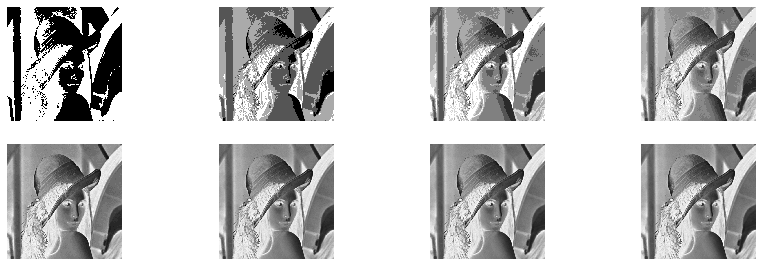

In [8]:
plt.subplots_adjust(top=1, right=2)
for i in range(1,9):
    q_img = BitQuantizeImage(img, i)
    plt.subplot(240+i)
    plt.axis("off")
    plt.imshow(negative(q_img, 255), 'gray')

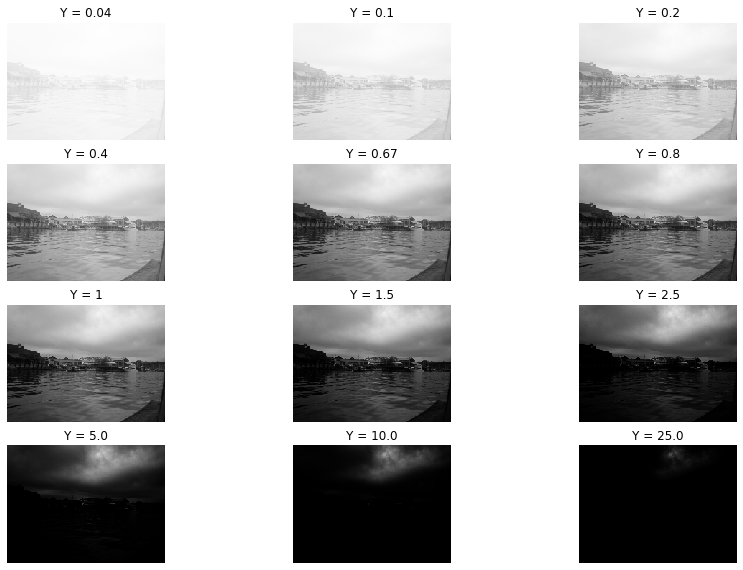

In [9]:
gammas = [0.04, 0.1, 0.2, 0.4, 0.67, 0.8, 1, 1.5, 2.5, 5.0, 10.0, 25.0]
plt.subplots_adjust(top=2, right=2)
for idx, gamma in enumerate(gammas):
#     print(idx, 240 +idx)
    plt.subplot(4, 3, idx+1)
    plt.axis("off")
    plt.title("Y = " + str(gamma))
    plt.imshow(pwr_law_t(img_plt, gamma), 'gray')

For Y < 1 the curve of gamma transformation lies below the curve y=x so the images are darker
For Y = 1 the curve of gamma transformation is y=x line so it is an identity transformation.
For Y > 1 the curve of gamma transformation lies above the line y=x so the images are brighter.

In [10]:
im1, im2 = do_pc_lr_t(img)

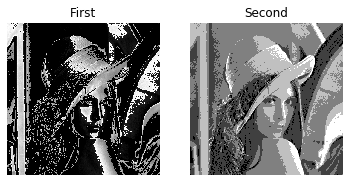

In [11]:
plt.subplot(121)
plt.axis("off")
plt.title("First")
plt.imshow(im1.astype(np.uint8), 'gray')
plt.subplot(122)
plt.axis("off")
plt.title("Second")
plt.imshow(im2.astype(np.uint8), 'gray')